In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# %load ../helper_funcs/get_df.py
def get_df(yr):
    return pd.read_csv("../../inputs/Environmental_Data_Deep_Moor_{}.csv".format(yr))

In [3]:
# %load ../helper_funcs/get_seasons.py
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [4]:
# %load ../helper_funcs/table_helpers.py
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]


def min_max_temps(yr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
            ) for s in get_seasons(yr)]

In [5]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')] 

Set a different alpha(opacity) corresponding to value of average temperature

In [6]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]

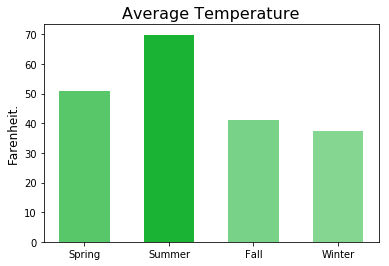

In [7]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
plt.show()

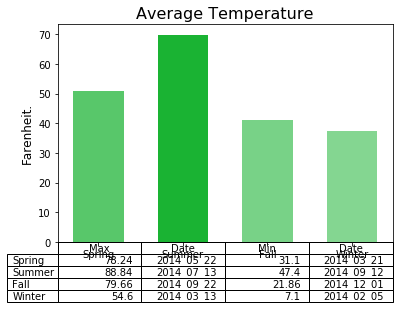

In [8]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns)
plt.show()

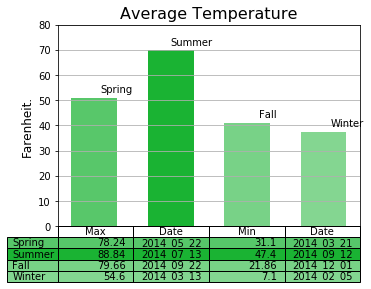

In [9]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors],
         loc='bottom')
plt.xticks([])
[plt.text(i,h+2,s) for i,h,s in zip([.08,1,2.15,3.1],heights,seasons)]
plt.ylim(0,80)
plt.subplots_adjust(left=0.2, bottom=.1,top=.8)
plt.grid(True)
plt.show()